# Observations

In this tutorial, we introduce $\mathrm{LiMe}$ observations. Before you can measure a line, you need to declare an observation that contains the spectrum of the astronomical object. $\mathrm{LiMe}$ provides three observation types:

* $\tt{Spectrum}$: Suitable for long-slit observations. Both the spectrum dispersion axis (e.g., wavelength in angstroms) and the energy density axis (e.g., flux in MJy) are one-dimensional.
* $\tt{Cube}$: Suitable for integral field spectrograph observations. In these datasets, the spectrum dispersion axis is one-dimensional, while the energy density has three dimensions.
* $\tt{Sample}$: Manages multiple observations, which can be exported as multiple $\tt{lime.Spectrum}$ or $\tt{lime.Cube}$ objects. The class functions do not load the data until a particular dataset is requested, making it suitable for platforms with limited computational resources.

<div class="alert alert-success" role="alert">

**Remember:** $LiMe$ can create these observations directly [from supported **.fits** files](../2_guides/0_creating_observations.ipynb), a [text file](../2_guides/0_creating_observations.ipynb) or by providing [the scientific data directly](../2_guides/0_creating_observations.ipynb).

</div>

## Functions design

<img src="../0_resources/images/LiMe_structure.png" alt="LiMe structure" title="LiMe structure"/>


The figure above illustrates the composite design of $\mathrm{LiMe}$: observations use instances of other classes to organize the available operations. 

This modular approach is similar to that of [IRAF (see Tody 1986)](https://ui.adsabs.harvard.edu/abs/1986SPIE..627..733T/abstract), for example:
- The $\tt{.fit}$ module contains the measuring functions.
- The $\tt{.plot}$ module contains the plotting functions.
- The $\tt{.check}$ module contains the interactive plotting functions.


For example, if we load an observation from the [examples/0_resources/spectra folder](https://github.com/Vital-Fernandez/lime/tree/master/examples):

In [17]:
import sys
print(sys.path)

import lime
from pathlib import Path    


# Locate the data
data_folder = Path('../0_resources/spectra')
sloan_SHOC579 = data_folder/'sdss_dr18_0358-51818-0504.fits'

# Create a spectrum observation
spec = lime.Spectrum.from_file(sloan_SHOC579, instrument='sdss', redshift=0.0479)

['/home/vital/PycharmProjects/aspect/src', '/home/vital/PycharmProjects/lime/src', '/home/vital/anaconda3/envs/lime2/lib/python312.zip', '/home/vital/anaconda3/envs/lime2/lib/python3.12', '/home/vital/anaconda3/envs/lime2/lib/python3.12/lib-dynload', '', '/home/vital/anaconda3/envs/lime2/lib/python3.12/site-packages']


We can plot the spectrum using the $\tt{.spectrum}$ function in the $\tt{.plot}$ module: 

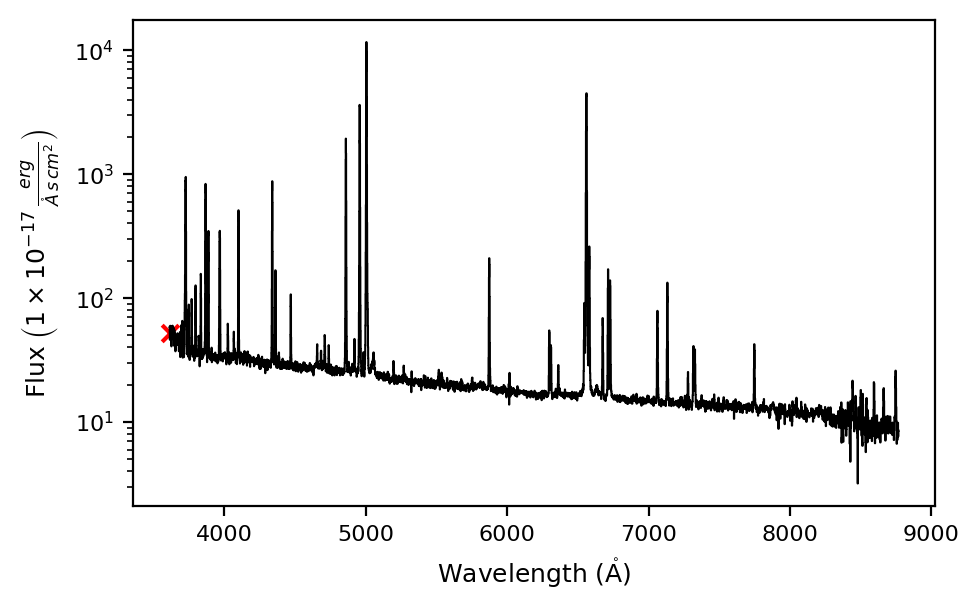

In [18]:
spec.plot.spectrum(log_scale=True, rest_frame=True)

Similarly we can plot a line using  $\tt{.bands}$ function in the same module: 

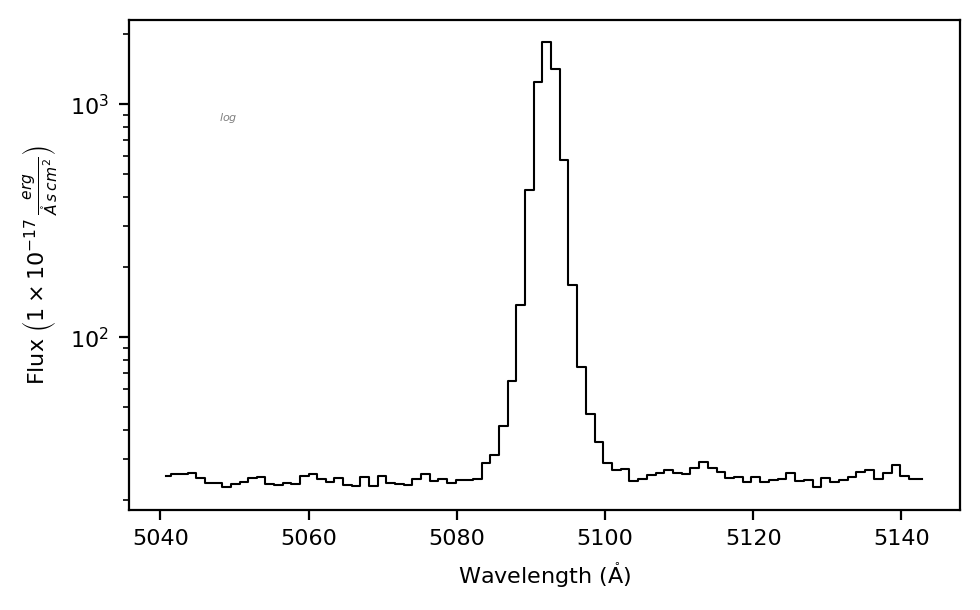

In [19]:
spec.plot.bands('H1_4861A')

Finally, you can fit the line using  the $\tt{.band}$ function in the  $\tt{.fit}$ module  

In [20]:

spec.fit.bands('H1_4861A')

If we run  $\tt{plot.bands}$ again we can check the profile (if no line label is provided the last fitting in the measurements is displayed): 

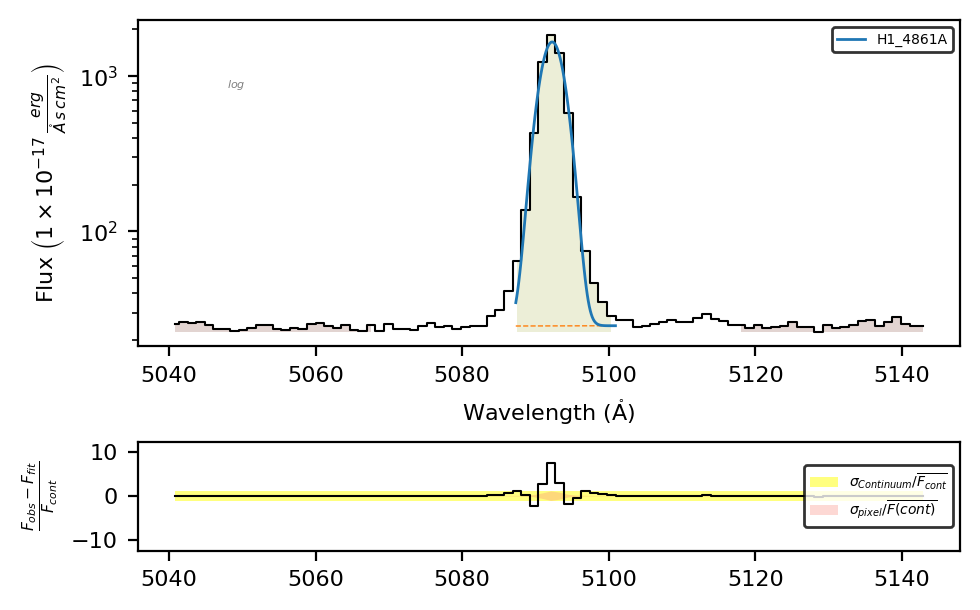

In [21]:
spec.plot.bands()

## Takeaways

* The $\mathrm{LiMe}$ $\tt{Spectrum}$, $\tt{Cube}$ and $\tt{Sample}$ observations match astronomical spectroscopic datasets.
* $\mathrm{LiMe}$ can create observations directly from the **.fits** files of some instruments or by supplying the unpack data directly. You can read more about these options [here](../2_guides/0_open_fits_files.ipynb).
* Observations provide several functions to measure, plot and interact with the data. You can check the complete list and their attributes in the [API](https://duckduckgo.com).